# PhD Thesis
# Chapter 5

In [3]:
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [4]:
dir = './figures/chapter5/'
plt.rc('text', usetex=True)

# 5.1 Introduction: 
# G2 module with variable mass and M module

In [3]:
# Parameter values and initial conditions
params = {'k_m0': 0.2, 'k_m1': 0.4, 'k_m1a': 20.0, 'k_m2': 0.4, 'k_m2a': 50.0, 'k_m3': 0.2, 'k_m3a': 6.35,
    'V_w1': 1.0, 'k_w2': 5.3, 'J_w1': 0.01, 'J_w2': 0.01,
    'k_c1': 8.5, 'V_c2': 3.8, 'J_c1': 0.01, 'J_c2': 0.01,
    'k_i1': 1.7, 'V_i2': 0.4, 'J_i1': 0.001, 'J_i2': 0.001,
    'k_a1': 6.8, 'V_a2': 1.7, 'J_a1': 0.001, 'J_a2': 0.001,
    'alpha': 0.05, 'Wee1_T': 1.0, 'Cdc25_T': 1.0, 'IE_T':1.0, 'APC_T':1.0, 'theta_M': 0.2,
    'mu': 0.07, 'K_Mass': 2.7}

In [4]:
# Model
MPFstr = 'k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF'
MPF_Pstr = '(k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF_P'
Wee1str = 'V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + MPF_P*alpha)*Wee1/(J_w2 + Wee1)'
Cdc25_Pstr = 'k_c1*(MPF + MPF_P*alpha)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - V_c2*Cdc25_P/(J_c2 + Cdc25_P)'
IEstr = 'k_i1*(MPF + MPF_P*alpha)*(IE_T - IE)/(J_i1 + IE_T - IE) - V_i2*IE/(J_i2 + IE)'
APCstr = 'k_a1*IE*(APC_T - APC)/(J_a1 + APC_T - APC) - V_a2*APC/(J_a2 + APC)'
Massstr = 'mu*Mass*(1 - Mass/K_Mass)'

In [5]:
DSargs = args(name='G2module')
DSargs.pars = params
DSargs.tdata = [0, 200]
DSargs.pdomain = {'V_c2': [0, 6.0]}
DSargs.xdomain = {'MPF': [0, 100], 'MPF_P': [0, 100], 'Wee1': [0, 1], 'Cdc25_P': [0, 1], 'IE': [0, 1], 'APC': [0, 1], 'Mass': [0, 10]}
DSargs.varspecs = {'MPF': MPFstr, 'MPF_P': MPF_Pstr, 'Wee1': Wee1str, 'Cdc25_P': Cdc25_Pstr, 'IE': IEstr, 'APC':APCstr, 'Mass': Massstr}

In [6]:
DS = Generator.Vode_ODEsystem(DSargs)

In [7]:
fps = pp.find_fixedpoints(DS, n=2, eps=1e-8)
fps

({'APC': 0.12746822316440304,
  'Cdc25_P': 0.010818110645843869,
  'IE': 0.24833828569655556,
  'MPF': 0.21885712782079617,
  'MPF_P': 0.31610184129319296,
  'Mass': 2.7000000056521811,
  'Wee1': 0.038963401834132758},
 {'APC': 0.0,
  'Cdc25_P': 0.0,
  'IE': 0.0,
  'MPF': 0.0,
  'MPF_P': 0.0,
  'Mass': 0.0,
  'Wee1': 1.0},
 {'APC': 1.4407431548385317e-05,
  'Cdc25_P': 0.0068652104503040077,
  'IE': 0.0035542521522878559,
  'MPF': 0.051447807853367805,
  'MPF_P': 2.647317679792621,
  'Mass': 2.7000000000051401,
  'Wee1': 0.75087418529935546},
 {'APC': 1.2081310240837133e-05,
  'Cdc25_P': 0.0064144002379019297,
  'IE': 0.0029872579343419615,
  'MPF': 0.043695979489002362,
  'MPF_P': 2.6552687473029097,
  'Mass': 2.7000000000005047,
  'Wee1': 0.87720916712260588})

Four steady states found: the trivial, the saddle,  the stable node, and one where both Wee1 and Cdc25 are inactive.
We follow the steady states starting from the stable node.

In [8]:
PC = ContClass(DS)

name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'APC': 1.2081310240837133e-05,
                    'Cdc25_P': 0.0064144002379019297,
                    'IE': 0.0029872579343419615,
                    'MPF': 0.043695979489002362,
                    'MPF_P': 2.6552687473029097,
                    'Mass': 2.7000000000005047,
                    'Wee1': 0.87720916712260588}
PCargs.freepars = ['V_c2']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
MPF  =  0.0384024845622
Cdc25_P  =  0.00316578676891
V_c2  =  6.00000001728
Mass  =  2.7
MPF_P  =  2.66067167461
APC  =  1.08038310263e-05
Wee1  =  0.911236316167
IE  =  0.00267476107681

Maximum test function iterations reached.

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
MPF  =  0.048044371204
Cdc25_P  =  0.00778503034255
V_c2  =  3.47168339841
Mass  =  2.7
MPF_P  =  2.65081526109
APC  =  1.33082479095e-05
Wee1  =  0.825998516241
IE  =  0.0032866495368

Eigenvalues = 

     (-1655.641090,0.000000)
     (-115.576536,0.000000)
     (-0.000000,0.000000)
     (-0.199879,0.000000)
     (-36.960788,0.000000)
     (-21.768177,0.000000)
     (-0.070000,0.000000)


a = 1.9720272893213502

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

B Point found 
0 : 
MPF  =  0.0540606487689
Cdc25_P  =  0.00353713522197
V_c2  =  6.0000000043
M

In [9]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'APC': 0.12746822316440304,
                    'Cdc25_P': 0.010818110645843869,
                    'IE': 0.24833828569655556,
                    'MPF': 0.21885712782079617,
                    'MPF_P': 0.31610184129319296,
                    'Mass': 2.7000000056521811,
                    'Wee1': 0.038963401834132758}
PCargs.freepars = ['V_c2']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
MPF  =  0.217044584308
Cdc25_P  =  0.00490601007542
V_c2  =  6.0000000173
Mass  =  2.7
MPF_P  =  0.352339196313
APC  =  0.117857278239
Wee1  =  0.0389639501085
IE  =  0.248177653485

B Point found 
0 : 
MPF  =  0.233448802918
Cdc25_P  =  1.0
V_c2  =  -8.69554505465e-10
Mass  =  2.7
MPF_P  =  0.0243673008178
APC  =  0.298349004273
Wee1  =  0.0389593877192
IE  =  0.249519966649



In [12]:
# Save PC for later use
PC_SNICVC2 = PC;

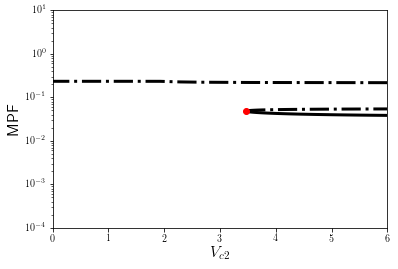

In [13]:
PC[name1].display(('V_c2', 'MPF'), stability=True, linewidth=3)
PC[name2].display(('V_c2', 'MPF'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((0, 6))
PC.plot.fig1.axes1.axes.set_xlabel(r'$V_{c2}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((1e-4, 10))
PC.plot.fig1.axes1.axes.set_ylabel('MPF', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2MModulesMassBifurcationVc2MPF.pdf', bbox_inches='tight')

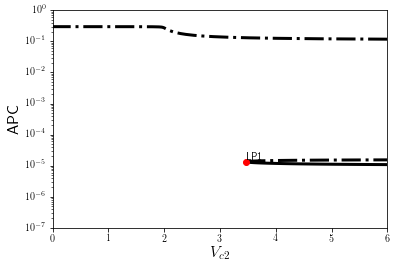

In [14]:
PC[name1].display(('V_c2', 'APC'), stability=True, linewidth=3)
PC[name2].display(('V_c2', 'APC'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((0, 6))
PC.plot.fig1.axes1.axes.set_xlabel(r'$V_{c2}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((1e-7, 1))
PC.plot.fig1.axes1.axes.set_ylabel('APC', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')

# Section 5.2
# G2 module: saddle-node bifurcation driven by cell mass

Chosing APC as constant equal its value at the SNIC$_{V_{c2}}$.

In [15]:
# Parameter values and initial conditions
params = {'k_m0': 0.2, 'k_m1': 0.4, 'k_m1a': 20.0, 'k_m2': 0.4, 'k_m2a': 50.0, 'k_m3': 0.2, 'k_m3a': 6.35,
    'V_w1': 1.0, 'k_w2': 5.3, 'J_w1': 0.01, 'J_w2': 0.01,
    'k_c1': 8.5, 'V_c2': 1.4, 'J_c1': 0.01, 'J_c2': 0.01,
    'APC': 1.33082479095e-05, 'alpha': 0.05, 'Wee1_T': 1.0, 'Cdc25_T': 1.0, 'theta_M': 0.2, 'Mass': 0.5}

In [16]:
# Model
MPFstr = 'k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF'
MPF_Pstr = '(k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF_P'
Wee1str = 'V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + alpha*MPF_P)*Wee1/(J_w2 + Wee1)'
Cdc25_Pstr = 'k_c1*(MPF + alpha*MPF_P)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - V_c2*Cdc25_P/(J_c2 + Cdc25_P)'

In [17]:
DSargs = args(name='G2module')
DSargs.pars = params
DSargs.tdata = [0, 20]
DSargs.pdomain = {'Mass': [0.01, 4.0], 'V_c2': [0, 6.0]}
DSargs.xdomain = {'MPF': [0, 4], 'MPF_P': [0, 4], 'Wee1': [0, 1], 'Cdc25_P': [0, 1]}
DSargs.varspecs = {'MPF': MPFstr, 'MPF_P': MPF_Pstr, 'Wee1': Wee1str, 'Cdc25_P': Cdc25_Pstr}
DS = Generator.Vode_ODEsystem(DSargs)

The system has three fixed points

In [18]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'Cdc25_P': 0.0022910377399485218,
  'MPF': 0.0063360988415248247,
  'MPF_P': 0.49345272195391215,
  'Wee1': 0.9980566216389779},
 {'Cdc25_P': 0.92212460938880569,
  'MPF': 0.1672341829647318,
  'MPF_P': 0.33255463783070344,
  'Wee1': 0.74934483033946364},
 {'Cdc25_P': 0.99491575880810912,
  'MPF': 0.48295522554003739,
  'MPF_P': 0.016833595255399642,
  'Wee1': 0.0062895964453626692})

Lower stable node, saddle node, and upper stable node.

### Bifurcation diagrams
Start from the lower stable node.

In [19]:
icdict = {'MPF': 0.0063360988415248247,
          'MPF_P': 0.49345272195391215,
          'Wee1': 0.9980566216389779,
          'Cdc25_P': 0.0022910377399485218}
DSargs.ics=icdict
DS = Generator.Vode_ODEsystem(DSargs)
PC = ContClass(DS)

name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['Mass']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
MPF  =  2.69639743139e-11
Cdc25_P  =  8.42766693452e-12
Wee1  =  0.999999999993
Mass  =  2.29258714276e-09
MPF_P  =  2.26465487499e-09

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000005
  |transpose(A)p| = 0.000031

LP Point found 
0 : 
MPF  =  0.0486059402404
Cdc25_P  =  0.0404950521925
Wee1  =  0.976645391887
Mass  =  1.74651045588
MPF_P  =  1.69716686226

Eigenvalues = 

     (-56.244604,0.000000)
     (-8.896248,0.000000)
     (0.000005,0.000000)
     (-0.200085,0.000000)


a = 67.545038154023644

Neutral saddle found!

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000009
  |transpose(A)p| = 0.000275

LP Point found 
0 : 
MPF  =  0.213178438876
Cdc25_P  =  0.968720989633
Wee1  =  0.0655929006742
Mass  =  0.252556219538
MPF_P  =  0.039271111419



#### Plots

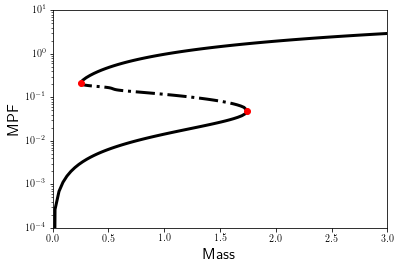

In [20]:
PC['EQ1'].display(('Mass', 'MPF'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((0, 3))
PC.plot.fig1.axes1.axes.set_xlabel('Mass', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((1e-4, 10))
PC.plot.fig1.axes1.axes.set_ylabel('MPF', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2ModuleBifurcationMassMPF.pdf', bbox_inches='tight')

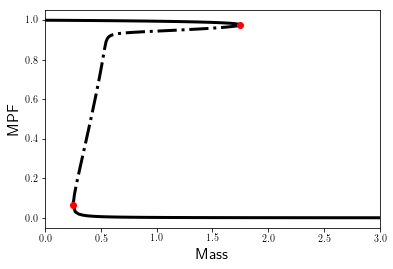

In [21]:
PC['EQ1'].display(('Mass', 'Wee1'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 3))
PC.plot.fig1.axes1.axes.set_xlabel('Mass', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.05, 1.05))
PC.plot.fig1.axes1.axes.set_ylabel('MPF', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2ModuleBifurcationMassWee1.pdf', bbox_inches='tight')

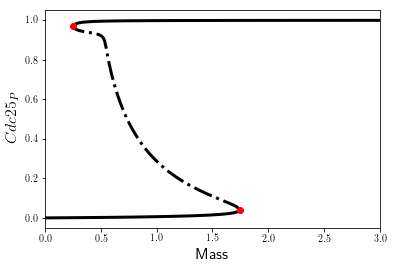

In [22]:
PC['EQ1'].display(('Mass', 'Cdc25_P'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 3))
PC.plot.fig1.axes1.axes.set_xlabel('Mass', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.05, 1.05))
PC.plot.fig1.axes1.axes.set_ylabel('$Cdc25_{P}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2ModuleBifurcationMassCdc25.pdf', bbox_inches='tight')

#### Verify results

In [27]:
def eval_params_nondim(PC):
    point = PC.curves['EQ1'].getSpecialPoint('LP1')
    params = PC.model.pars
    k_m = point['MPF'] + params['alpha']*point['MPF_P']
    a = (params['k_m2'] + params['k_m2a']*point['Wee1'])/params['k_m3']
    b = (params['k_m1'] + params['k_m1a']*point['Cdc25_P'])/params['k_m3']
    c = params['k_m2a']*point['MPF']*params['Wee1_T']/params['k_m3']
    d = params['k_m1a']*point['MPF_P']*params['Cdc25_T']/params['k_m3']
    kappa_w = params['k_m2a']*params['Wee1_T']/params['k_m3']
    kappa_u = params['k_m1a']*params['Cdc25_T']/params['k_m3']
    beta_w = params['V_w1']/(params['Wee1_T']*params['k_m3'])
    gamma_w = params['k_w2']/(params['Wee1_T']*params['k_m3'])
    wstar = point['Wee1']/params['Wee1_T']
    gamma_u = params['k_c1']/(params['Cdc25_T']*params['k_m3'])
    beta_u = params['V_c2']/(params['Cdc25_T']*params['k_m3'])
    ustar = point['Cdc25_P']/params['Cdc25_T']
    epsilon1 = params['J_w1']/params['Wee1_T']
    epsilon2 = params['J_w2']/params['Wee1_T']
    epsilon3 = params['J_c1']/params['Cdc25_T']
    epsilon4 = params['J_c2']/params['Cdc25_T']
    A = 1 + a + b   
    B0 = beta_w*(1-wstar)/(epsilon1 + 1 - wstar) - gamma_w*k_m*wstar/(epsilon2 + wstar)
    B = beta_w*epsilon1/(epsilon1 + 1 - wstar)**2 + gamma_w*k_m*epsilon2/(epsilon2 + wstar)**2
    B2 = -beta_w*epsilon1/(epsilon1 + 1 - wstar)**3 + gamma_w*k_m*epsilon2/(epsilon2 + wstar)**3
    C0 = gamma_u*k_m*(1-ustar)/(epsilon3 + 1 - ustar) - beta_u*ustar/(epsilon4 + ustar)
    C = gamma_u*k_m*epsilon3/(epsilon3 + 1 - ustar)**2 + beta_u*epsilon4/(epsilon4 + ustar)**2
    C2 = gamma_u*k_m*epsilon3/(epsilon3 + 1 - ustar)**3 + beta_u*epsilon4/(epsilon4 + ustar)**3
    D = gamma_w*wstar/(epsilon2 + wstar)
    D2 = gamma_w*wstar/(epsilon2 + wstar)**2
    E = gamma_u*(1 - ustar)/(epsilon3 + 1 - ustar)
    E2 = gamma_u*(1 - ustar)/(epsilon3 + 1 - ustar)**2
    F = (A + B + C)**2 - 4*(A*B + B*C + C*A) + 4*(1 - params['alpha'])*(c*D + d*E)
    GH = (1 - params['alpha'])*C*D/(B**2*C**2 - (1 - params['alpha'])*(c*C**2*D - d*B**2*E))
    G = GH*C*D
    H = GH*B*E
    sigma0 = (B*C - c*C*G - d*B*H)*((kappa_w*B*C - (1-params['alpha'])*c*C*D2)*G - (kappa_u*B*C - (1-params['alpha'])*d*B*E2)*H) + c*C*B2*G**2 - b*B*C2*H**2
    return {'a': a, 'b': b, 'c': c, 'd': d,
            'A': A, 'B0': B0, 'B': B, 'C0': C0, 'C':C,
            'D': D, 'E': E, 'F': F, 'sigma0': sigma0}

In [28]:
out = eval_params_nondim(PC)
display(Math(r'ABC = ' + str(out['A']*out['B']*out['C'])))
display(Math(r'(1-\alpha)(cCD + dBE) = ' + str((1-params['alpha'])*(out['c']*out['C']*out['D'] + out['d']*out['B']*out['E']))))
display(Math(r'\lambda_{+} = ' + str((-(out['A'] + out['B'] + out['C']) + sqrt(out['F']))/2*params['k_m3'])))
display(Math(r'\lambda_{-} = ' + str((-(out['A'] + out['B'] + out['C']) - sqrt(out['F']))/2*params['k_m3'])))
display(Math(r'\sigma_{0} = ' + str(out['sigma0'])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Section 5.3 
## G2 module with variable cell mass: saddle-node bifurcation driven by $V_{c2}$

**Two bifurcation diagram**

Right saddle-node

In [29]:
# Two-parameter bifurcation
namefold1 = 'FO1'
PCargs = args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['Mass', 'V_c2']
PCargs.StepSize = 1e-1
PCargs.MaxNumPoints = 100
PCargs.MaxStepSize = 1e-0
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)

PC.curves[namefold1].forward()
PC.curves[namefold1].backward()


Checking...
  |a| = -10721.800544


CP Point found 
0 : 
MPF  =  -3.34799816278e-10
Cdc25_P  =  0.0415696698333
Mass  =  -1.21276769871e-08
MPF_P  =  -1.17877549445e-08
Wee1  =  1.00000000005
V_c2  =  -9.64470587071e-09

Eigenvalues = 

     (0.000000,0.000000)
     (-51.831478,0.000000)
     (-100.000002,0.000000)
     (-0.200085,0.000000)


Maximum test function iterations reached.


Checking...
  |a| = -10721.775572


CP Point found 
0 : 
MPF  =  5.93302253802e-59
Cdc25_P  =  5.23771293949
Mass  =  8.77527765618e-59
MPF_P  =  2.83827220227e-59
Wee1  =  1.0
V_c2  =  5.18579238327e-58

Eigenvalues = 

     (-0.000000,0.000000)
     (-155.754343,0.000000)
     (-100.000001,0.000000)
     (-0.200085,0.000000)


Maximum test function iterations reached.


Checking...
  |a| = -10721.774833


CP Point found 
0 : 
MPF  =  -9.77661544233e-88
Cdc25_P  =  7.22892387699
Mass  =  -1.31762513567e-87
MPF_P  =  -3.39403767817e-88
Wee1  =  1.0
V_c2  =  -8.47967849215e-87

Eigenvalues = 

     (0.00

Left saddle-node

In [30]:
# Two-parameter bifurcation
namefold2 = 'FO2'
PCargs = args(name=namefold2)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP2'
PCargs.freepars = ['Mass', 'V_c2']
PCargs.StepSize = 1e-1
PCargs.MaxNumPoints = 100
PCargs.MaxStepSize = 1e-0
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)

PC.curves[namefold2].forward()
PC.curves[namefold2].backward()

B Point found 
0 : 
MPF  =  0.21245877106
Cdc25_P  =  1.0000000002
Mass  =  0.251413566268
MPF_P  =  0.0388486085739
Wee1  =  0.0673355218784
V_c2  =  -3.74781976975e-08

B Point found 
0 : 
MPF  =  0.706654754108
Cdc25_P  =  0.545595394013
Mass  =  0.742513466579
MPF_P  =  0.0355451056642
Wee1  =  0.00358118539345
V_c2  =  5.99999998678



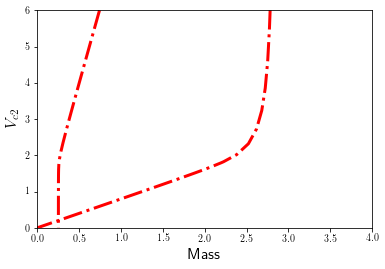

In [31]:
PC[namefold1].display(('Mass', 'V_c2'), stability=True, linewidth=3)
PC[namefold2].display(('Mass', 'V_c2'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B','ZH','CP'])
PC.plot.fig1.axes1.axes.set_xlim((0, 4))
PC.plot.fig1.axes1.axes.set_xlabel('Mass', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0, 6))
PC.plot.fig1.axes1.axes.set_ylabel(r'$V_{c2}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2ModuleBifurcationTwoPars.pdf', bbox_inches='tight')

#### Now, we find the saddle node bifurcation for the extended G2 module
Changing $V_{c2}$ to 3.8 in order to be able to follow the steady states.

In [32]:
# Parameter values
params = {'k_m0': 0.2, 'k_m1': 0.4, 'k_m1a': 20.0, 'k_m2': 0.4, 'k_m2a': 50.0, 'k_m3': 0.2, 'k_m3a': 6.35,
    'APC': 1.22080e-05, 'IE': 0.002981,
    'V_w1': 1.0, 'k_w2': 5.3, 'J_w1': 0.01, 'J_w2': 0.01,
    'k_c1': 8.5, 'V_c2': 3.8, 'J_c1': 0.01, 'J_c2': 0.01,
    'alpha': 0.05, 'Wee1_T': 1.0, 'Cdc25_T': 1.0, 'theta_M': 0.2,
    'mu': 0.07, 'K_Mass': 2.7}

In [33]:
# Model
MPFstr = 'k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF'
MPF_Pstr = '(k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC)*MPF_P'
Wee1str = 'V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + MPF_P*alpha)*Wee1/(J_w2 + Wee1)'
Cdc25_Pstr = 'k_c1*(MPF + MPF_P*alpha)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - V_c2*Cdc25_P/(J_c2 + Cdc25_P)'
Massstr = 'mu*Mass*(1 - Mass/K_Mass)'

In [34]:
DSargs = args(name='G2moduleMass')
DSargs.pars = params
DSargs.tdata = [0, 200]
DSargs.pdomain = {'V_c2': [0, 6.0], 'APC': [0, 1]}
DSargs.xdomain = {'MPF': [0, 100], 'MPF_P': [0, 100], 'Wee1': [0, 1], 'Cdc25_P': [0, 1], 'Mass': [0, 100]}
DSargs.varspecs = {'MPF': MPFstr, 'MPF_P': MPF_Pstr, 'Wee1': Wee1str, 'Cdc25_P': Cdc25_Pstr, 'Mass': Massstr}
DSargs.ics = icdict

In [35]:
DS = Generator.Vode_ODEsystem(DSargs)

In [36]:
# Steady States
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'Cdc25_P': 0.99799067551833509,
  'MPF': 2.6426569979599512,
  'MPF_P': 0.056296876697210597,
  'Mass': 2.6999999999747941,
  'Wee1': 0.00075980235882747605},
 {'Cdc25_P': 0.99799067548166387,
  'MPF': 2.6426569752480642,
  'MPF_P': 0.056296876269409511,
  'Mass': 2.6999999768261369,
  'Wee1': 0.00075980237758542578},
 {'Cdc25_P': 0.99799067544833087,
  'MPF': 2.6426569270529159,
  'MPF_P': 0.056296875546271788,
  'Mass': 2.6999999278888902,
  'Wee1': 0.0007598025553051884},
 {'Cdc25_P': 0.0068645101575272342,
  'MPF': 0.051426188142019685,
  'MPF_P': 2.6475276865379449,
  'Mass': 2.6999999999976065,
  'Wee1': 0.7512246420967722},
 {'Cdc25_P': 0.0064143233561383623,
  'MPF': 0.043695194178268205,
  'MPF_P': 2.655258680504089,
  'Mass': 2.7000000000000002,
  'Wee1': 0.87722082936954049},
 {'Cdc25_P': 0.0, 'MPF': 0.0, 'MPF_P': 0.0, 'Mass': 0.0, 'Wee1': 1.0})

Four steady stated found: the trivial, the stable node, the saddle, another with active MPF.

Middle steady state where the saddle-node takes place

In [37]:
PC = ContClass(DS)

name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'Cdc25_P': 0.0064143233561383623,
                    'MPF': 0.043695194178268205,
                    'MPF_P': 2.655258680504089,
                    'Mass': 2.7000000000000002,
                    'Wee1': 0.87722082936954049}
PCargs.freepars = ['V_c2']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
MPF  =  0.0383991043476
Cdc25_P  =  0.00316556249055
Mass  =  2.7
MPF_P  =  2.66055477033
Wee1  =  0.911282982363
V_c2  =  6.00000001728

Maximum test function iterations reached.

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
MPF  =  0.0480312366715
Cdc25_P  =  0.00777947457462
Mass  =  2.7
MPF_P  =  2.65092263801
Wee1  =  0.826130007264
V_c2  =  3.47292829315

Eigenvalues = 

     (-115.677267,0.000000)
     (-36.974306,0.000000)
     (-0.000000,0.000000)
     (-0.200078,0.000000)
     (-0.070000,0.000000)


a = 1.971728068287887

Neutral saddle found!

B Point found 
0 : 
MPF  =  0.054040619876
Cdc25_P  =  0.003536992106
Mass  =  2.7
MPF_P  =  2.64491325481
Wee1  =  0.648637077373
V_c2  =  6.00000000587



Upper steady state

In [38]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'Cdc25_P': 0.99799067551833509,
                    'MPF': 2.6426569979599512,
                    'MPF_P': 0.056296876697210597,
                    'Mass': 2.6999999999747941,
                    'Wee1': 0.00075980235882747605}
PCargs.freepars = ['V_c2']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
MPF  =  2.64257193616
Cdc25_P  =  0.99640965634
Mass  =  2.7
MPF_P  =  0.0563819385267
Wee1  =  0.000759827332425
V_c2  =  6.00000001742

B Point found 
0 : 
MPF  =  2.64276473379
Cdc25_P  =  1.00000000002
Mass  =  2.7
MPF_P  =  0.0561891408971
Wee1  =  0.000759770731992
V_c2  =  -4.13454041549e-08



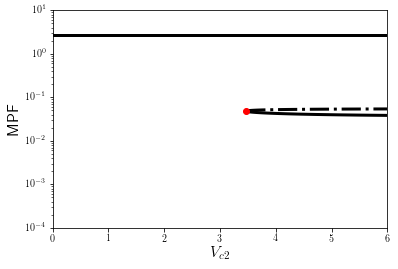

In [39]:
PC[name1].display(('V_c2', 'MPF'), stability=True, linewidth=3)
PC[name2].display(('V_c2', 'MPF'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((0, 6))
PC.plot.fig1.axes1.axes.set_xlabel(r'$V_{c2}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((1e-4, 10))
PC.plot.fig1.axes1.axes.set_ylabel('MPF', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'G2ModuleMassBifurcationVc2MPF.pdf', bbox_inches='tight')

## Section 5.5
## Normal form for the SNIC bifurcation driven by $V_{c2}$ as a representation of the G2/M transition

#### Length of the G2/M transition
$$T_{G2/M}=\frac{\pi}{\sqrt{\beta\gamma}}=\frac{\pi}{k_{m3}\sqrt{\sigma(cCB_0-dBC_0)}}$$

In [114]:
def eval_params_nondim_part2(PC):
    point = PC.curves['EQ1'].getSpecialPoint('LP1')
    params = PC.model.pars
    params['V_c2'] = 1.4 #point['V_c2'] # this is the bifurcation point (\beta=0)
    k_m = point['MPF'] + params['alpha']*point['MPF_P']
    a = (params['k_m2'] + params['k_m2a']*point['Wee1'])/params['k_m3']
    b = (params['k_m1'] + params['k_m1a']*point['Cdc25_P'])/params['k_m3']
    c = params['k_m2a']*point['MPF']*params['Wee1_T']/params['k_m3']
    d = params['k_m1a']*point['MPF_P']*params['Cdc25_T']/params['k_m3']
    kappa_w = params['k_m2a']*params['Wee1_T']/params['k_m3']
    kappa_u = params['k_m1a']*params['Cdc25_T']/params['k_m3']
    beta_w = params['V_w1']/(params['Wee1_T']*params['k_m3'])
    gamma_w = params['k_w2']/(params['Wee1_T']*params['k_m3'])
    wstar = point['Wee1']/params['Wee1_T']
    gamma_u = params['k_c1']/(params['Cdc25_T']*params['k_m3'])
    beta_u = params['V_c2']/(params['Cdc25_T']*params['k_m3'])
    ustar = point['Cdc25_P']/params['Cdc25_T']
    epsilon1 = params['J_w1']/params['Wee1_T']
    epsilon2 = params['J_w2']/params['Wee1_T']
    epsilon3 = params['J_c1']/params['Cdc25_T']
    epsilon4 = params['J_c2']/params['Cdc25_T']
    A = 1 + a + b   
    B0 = beta_w*(1-wstar)/(epsilon1 + 1 - wstar) - gamma_w*k_m*wstar/(epsilon2 + wstar)
    B = beta_w*epsilon1/(epsilon1 + 1 - wstar)**2 + gamma_w*k_m*epsilon2/(epsilon2 + wstar)**2
    B2 = -beta_w*epsilon1/(epsilon1 + 1 - wstar)**3 + gamma_w*k_m*epsilon2/(epsilon2 + wstar)**3
    C0 = gamma_u*k_m*(1-ustar)/(epsilon3 + 1 - ustar) - beta_u*ustar/(epsilon4 + ustar)
    C = gamma_u*k_m*epsilon3/(epsilon3 + 1 - ustar)**2 + beta_u*epsilon4/(epsilon4 + ustar)**2
    C2 = gamma_u*k_m*epsilon3/(epsilon3 + 1 - ustar)**3 + beta_u*epsilon4/(epsilon4 + ustar)**3
    D = gamma_w*wstar/(epsilon2 + wstar)
    D2 = gamma_w*wstar/(epsilon2 + wstar)**2
    E = gamma_u*(1 - ustar)/(epsilon3 + 1 - ustar)
    E2 = gamma_u*(1 - ustar)/(epsilon3 + 1 - ustar)**2
    F = (A + B + C)**2 - 4*(A*B + B*C + C*A) + 4*(1 - params['alpha'])*(c*D + d*E)
    GH = (1 - params['alpha'])*C*D/(B**2*C**2 - (1 - params['alpha'])*(c*C**2*D - d*B**2*E))
    G = GH*C*D
    H = GH*B*E
    sigma0 = (B*C - c*C*G - d*B*H)*((kappa_w*B*C - (1-params['alpha'])*c*C*D2)*G - (kappa_u*B*C - (1-params['alpha'])*d*B*E2)*H) + c*C*B2*G**2 - b*B*C2*H**2
    return {'a': a, 'b': b, 'c': c, 'd': d,
            'A': A, 'B0': B0, 'B': B, 'C0': C0, 'C':C,
            'D': D, 'E': E, 'F': F, 'sigma0': sigma0}

In [116]:
out = eval_params_nondim_part2(PC_SNICVC2)
beta = params['k_m3']*(out['c']*out['C']*out['B0'] - out['d']*out['B']*out['C0'])
gamma = -0.01 # k_m3*()
display(Math(r'\beta = ' + str(beta)))
display(Math(r'T_{G2/M} = ' + str(pi/sqrt(beta*gamma)*60) + ' min'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

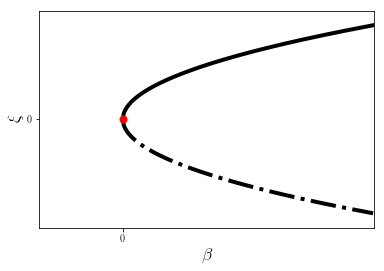

In [16]:
aa = np.arange(0, 3, 0.01)
plt.plot(aa, sqrt(aa), lw=4, ls='-', color='k')
plt.plot(aa, -sqrt(aa), lw=4, ls='-.', color='k')
plt.plot([0], [0], 'ro', ms=7)
plt.xlabel('$\\beta$', fontsize=18)
plt.ylabel('$\\xi$', fontsize=18)
plt.axis([-1, 3, -2, 2])
plt.xticks([0])
plt.yticks([0])
plt.savefig(dir + 'SNBifurcation.pdf', bbox_inches='tight')
plt.show()